# MULTILAYER PERCEPTRON

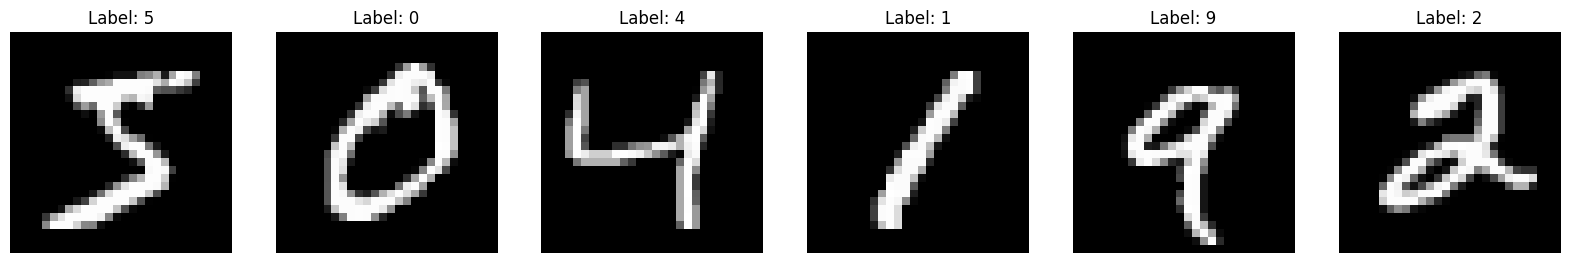

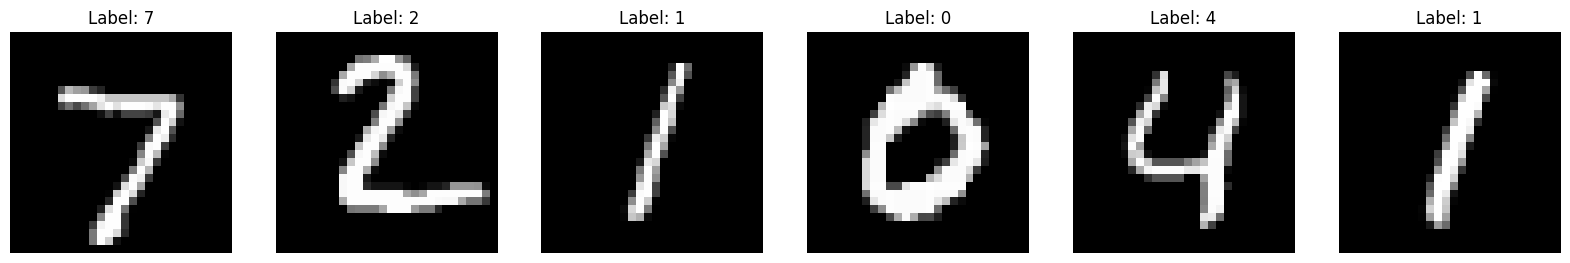

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.6162 - loss: 1.1344 - val_accuracy: 0.9428 - val_loss: 0.2168
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9061 - loss: 0.3832 - val_accuracy: 0.9573 - val_loss: 0.1636
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9260 - loss: 0.3064 - val_accuracy: 0.9628 - val_loss: 0.1463
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.9363 - loss: 0.2638 - val_accuracy: 0.9643 - val_loss: 0.1496
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.9434 - loss: 0.2452 - val_accuracy: 0.9665 - val_loss: 0.1279
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9496 - loss: 0.2050 - val_accuracy: 0.9674 - val_loss: 0.1237
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.9497 - loss: 0.2156 - val_accuracy: 0.9719 - val_loss: 0.1229
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.9506 - loss: 0

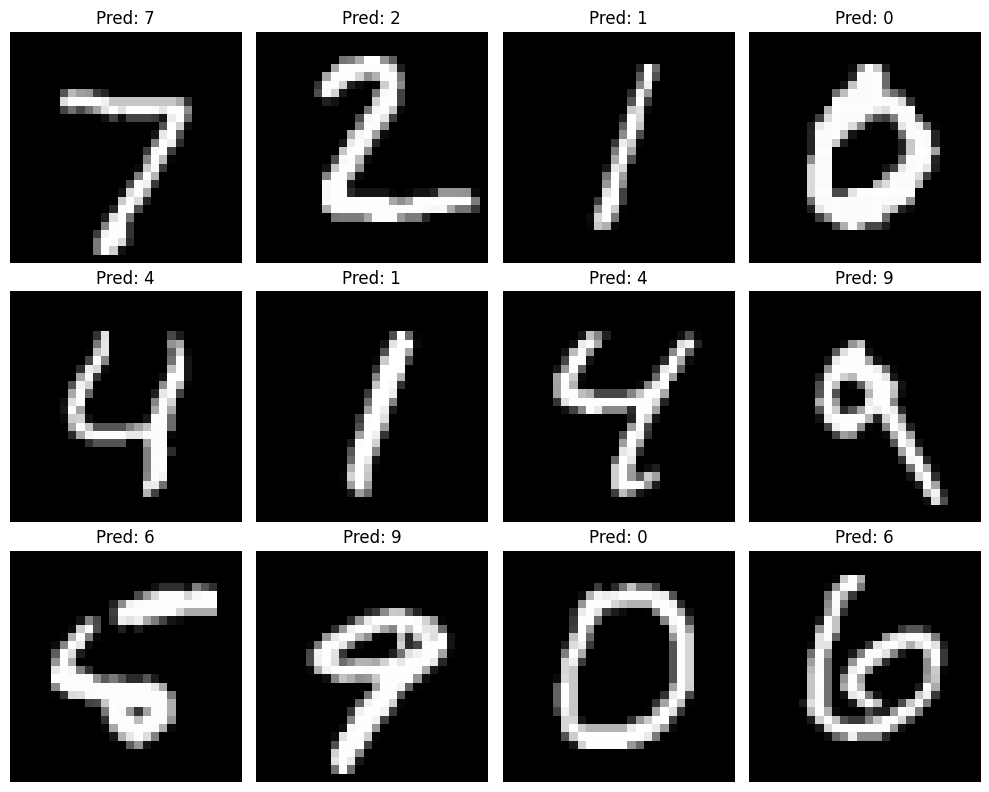

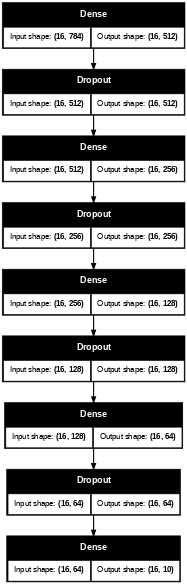

In [ ]:
#1. Handwritten Digit Recognition with MLP: Train on MNIST and visualize hidden layer activations.
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

#loading the data
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()



# sample visualization of x_train & x_test data

fig = plt.figure(figsize=(20,5))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1)
  ax.imshow(x_train[i],cmap = "gray")
  ax.set_title(f"Label: {y_train[i]}")
  plt.axis("off")

plt.show()

fig = plt.figure(figsize=(20,5))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1)
  ax.imshow(x_test[i],cmap = "gray")
  ax.set_title(f"Label: {y_test[i]}")
  plt.axis("off")

plt.show()


# data processing
x_train,x_test = x_train/255,x_test/255
x_train, x_test = x_train.reshape(-1,28*28),x_test.reshape(-1,28*28)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# finding the validation data
from sklearn.model_selection import train_test_split
x_train_split,x_val,y_train_split,y_val = train_test_split(x_train,y_train, test_size = 0.2 , random_state = 42)

#model_creation

model = Sequential([
    Dense(512,activation = "relu"),
    Dropout(0.5),
    Dense(256,activation="relu"),
    Dropout(0.5),
    Dense(128, activation = "relu"),
    Dropout(0.5),
    Dense(64,activation = "relu"),
    Dropout(0.5),
    Dense(10, activation= "softmax")]

)

#model-compilation and trainning
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.fit(
    x_train_split,y_train_split,
    epochs = 10,
    batch_size = 16,
    validation_data = (x_val,y_val)

)
#model visualisation

y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Display a few test images with predictions
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


#model architecture visualisation:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes= True,dpi = 40)




   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  -0.272246  -0.483615  -0.435762  -0.256833  -0.165227  -0.176443   
1  -0.403427   2.991784  -1.333912  -0.256833  -1.215182   1.894346   
2   0.124940  -0.483615   1.028326  -0.256833   0.628642  -1.829688   
3  -0.401494  -0.483615  -0.869402  -0.256833  -0.361560  -0.324558   
4  -0.005634  -0.483615   1.028326  -0.256833   1.328612   0.153642   

   Feature_6  Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  \
0   0.813062   0.116698  -0.626249  -0.595170    1.148500    0.448077   
1  -1.910361   1.247585  -0.856463  -0.348433   -1.718189    0.431906   
2   1.110488  -1.187439   1.675886   1.565287    0.784476    0.220617   
3  -1.236672   1.107180  -0.511142  -1.094663    0.784476    0.448077   
4   0.694808  -0.578572   1.675886   1.565287    0.784476    0.389882   

   Feature_12  
0    0.825220  
1   -1.329202  
2   -1.308500  
3   -0.652926  
4    0.263497  
Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 2

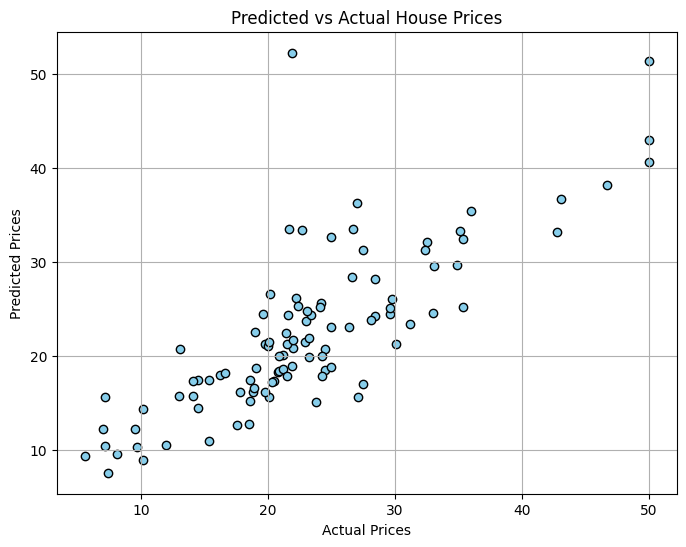

In [ ]:
#2 House Price Prediction using MLP: Use a housing dataset and plot predicted vs actual prices.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create DataFrame for inspection
df_train = pd.DataFrame(x_train, columns=[f"Feature_{i}" for i in range(x_train.shape[1])])
print(df_train.head())

# Train-validation split
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Model
model = Sequential([
    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(1)  # regression output
])

# Compile
model.compile(loss="mse", optimizer=Adam(learning_rate=0.03), metrics=["mse"])

# Train
model.fit(
    x_train_split, y_train_split,
    epochs=5,
    batch_size=16,
    validation_data=(x_val, y_val)
)

# Predict
y_pred = model.predict(x_test)
print(y_pred[:5])
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='k')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.grid(True)
plt.show()

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5028 - loss: 333.5432 - val_accuracy: 0.4870 - val_loss: 0.6935
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4985 - loss: 1.3269 - val_accuracy: 0.4874 - val_loss: 0.6934
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5036 - loss: 1.0408 - val_accuracy: 0.4874 - val_loss: 0.6934
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5055 - loss: 1.0366 - val_accuracy: 0.4874 - val_loss: 0.6933
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4966 - loss: 0.7181 - val_accuracy: 0.4874 - val_loss: 0.6936
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5019 - loss: 0.7380 - val_accuracy: 0.4874 - val_loss: 0.6933
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4974 - loss: 0.7918 - val_accuracy: 0.4874 - val_loss: 0.6933
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5017 - loss: 0.88

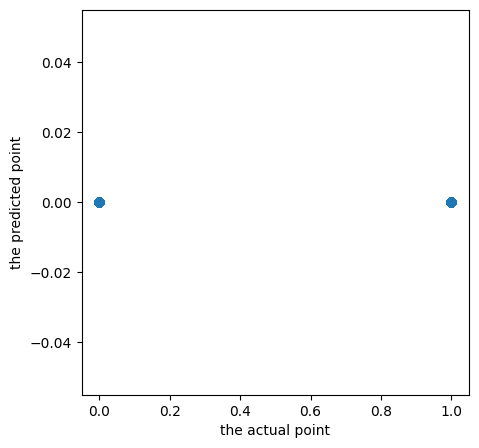

In [ ]:
# 4. Sentiment Classification using MLP: Use IMDb reviews, TF-IDF, and visualize training performance


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Dense,Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences


#loading  and processing the dataset

(x_train,y_train), (x_test,y_test)= imdb.load_data()
n_class = len(np.unique(y_train))
# as the training data is flatten , so we just have to encde the lebel data

y_train,y_test = to_categorical(y_train,n_class), to_categorical(y_test,n_class)



max_len = 400
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


# spliting of training data
from sklearn.model_selection import train_test_split
x_train_split,x_val,y_train_split,y_val = train_test_split(x_train,y_train, test_size = 0.2, random_state = 42)

#model building

model = Sequential([
    Dense(256, activation = "relu"),
    Dropout(0.2),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(64,activation = "relu"),
    Dropout(0.2),
    Dense(2,activation="softmax")
])

#model training and model compilation

model.compile(loss="categorical_crossentropy",optimizer =Adam(learning_rate=0.001),metrics = ["accuracy"])
model.fit (
    x_train_split,y_train_split,
    epochs = 10,
    batch_size = 16,
    validation_data = (x_val,y_val)

)


score = model.evaluate(x_test,y_test)
print(f"accurecy of the model is {score[1]}, loss inthe model is {score[0]}")

# visualisation part
y_pred=model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)



plt.figure(figsize=(5,5))
plt.scatter(y_test_classes, y_pred_classes)

plt.xlabel("the actual point")
plt.ylabel("the predicted point")
plt.show()









Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.5680 - loss: 1.1771 - val_accuracy: 0.8003 - val_loss: 0.5354
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.7649 - loss: 0.6424 - val_accuracy: 0.8175 - val_loss: 0.4716
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7882 - loss: 0.5845 - val_accuracy: 0.8326 - val_loss: 0.4585
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.8002 - loss: 0.5657 - val_accuracy: 0.8431 - val_loss: 0.4257
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.8127 - loss: 0.5412 - val_accuracy: 0.8588 - val_loss: 0.4117
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8275 - loss: 0.5074 - val_accuracy: 0.8562 - val_loss: 0.4005
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.8286 - loss: 0.5016 - val_accuracy: 0.8602 - val_loss: 0.3995
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.8344 - loss: 0

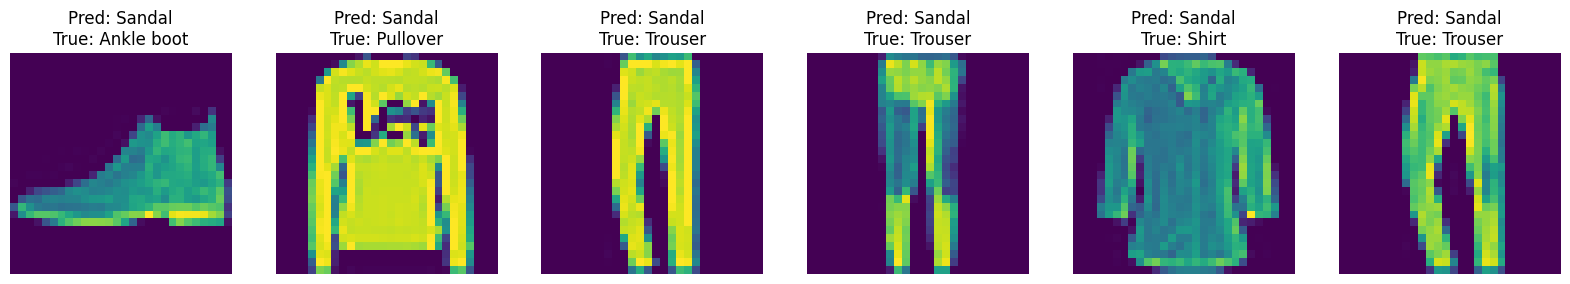

In [ ]:
#4.Fashion Classification MLP: Compare performance on Fashion-MNIST and visualize

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy


# model loading
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
x_train_split,x_val , y_train_split,y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)


# data preprocessing
size =x_train.shape[1]
num_class = len(np.unique(y_train))

x_train, x_test = x_train.reshape(-1, size*size)/255, x_test.reshape(-1,size*size)/255
y_train , y_test =to_categorical(y_train, num_class), to_categorical(y_test, num_class)
x_train_split = x_train_split.reshape(-1, size*size) / 255.0
x_val = x_val.reshape(-1, size*size) / 255.0
x_test = x_test.reshape(-1, size*size) / 255.0
y_train_split = to_categorical(y_train_split, num_class)
y_val = to_categorical(y_val, num_class)


#model creation

model = Sequential([
    Dense(512, activation = "relu"),
    Dropout(0.5),
    Dense(128 , activation="relu"),
    Dropout(0.5),
    Dense(64,activation = "relu"),
    Dropout(0.5),
    Dense(num_class , activation = "softmax")

])
model.compile(loss ="categorical_crossentropy", optimizer = Adam(learning_rate = 0.001),metrics=["accuracy"])
model.fit(
    x_train_split , y_train_split,
    epochs = 10,
    batch_size= 16,
    validation_data = (x_val,y_val)

)


score = model.evaluate(x_test,y_test)
print(f"the accurecy is {score[1]}, the loass is {score[0]}")

#model_visualisation

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_pred_probs= model.predict(x_test)
y_pred_class= np.argmax(y_pred_probs, axis =1)
y_true_class = np.argmax(y_test, axis=1)


fig = plt.figure(figsize = (20,5))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1)
  ax.imshow(x_test[i].reshape(28,28))
  ax.set_title(f"Pred: {class_names[y_pred_class[i]]}\nTrue: {class_names[y_true_class[i]]}")
  ax.axis("off")

plt.show()





